Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [53]:
sales = pd.read_excel('sales data.xlsx', header=1)
sales.head(10)

,direction,subdivison,1 decade,2 decade,3 decade,plan
0,wallpaper,TH,4940806.10,5439009.97,4702537.01,17800000
1,construction,TH,5233464.51,4670343.02,3630882.83,15900000
2,household,TH,3989234.59,3646855.82,3629957.57,13900000
3,coverage,TH,2105833.80,1516256.63,1556741.91,6500000
4,tools,TH,6180421.75,5361357.97,2152418.47,17200000
5,electrician,TH,1574338.47,1377391.75,954410.06,4800000
6,furniture,TH,1026869.09,1005224.21,929625.47,4400000
7,plumbing,TH,3033853.59,3334901.81,3325717.87,10900000
8,wallpaper,BH,2770885.94,2587974.14,2160838.88,9300000
9,construction,BH,6032452.53,5248773.27,3260453.06,16900000


In [54]:
# изменим размерность выручки в тыс. р.
sales['1 decade'] = round(sales['1 decade'] * 0.001, 3)
sales['2 decade'] = round(sales['2 decade'] * 0.001, 3)
sales['3 decade'] = round(sales['3 decade'] * 0.001, 3)
sales['plan'] = round(sales['plan'] * 0.001, 3)

array([<Axes: ylabel='plan'>], dtype=object)

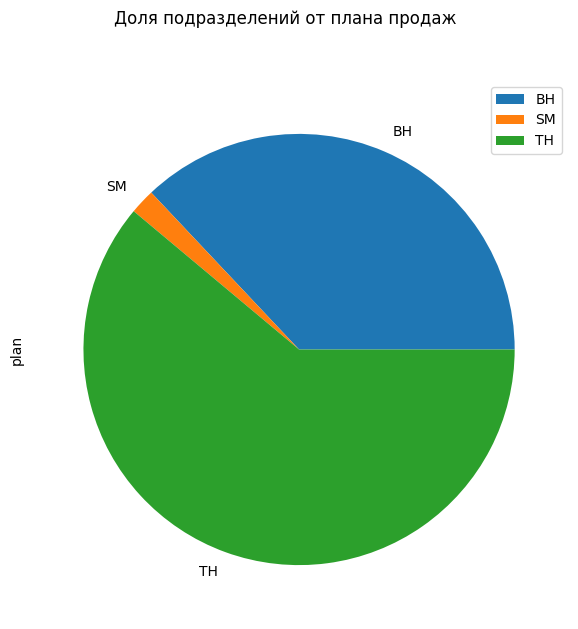

In [55]:
percentage_of_plan = sales[['plan', 'subdivison']].groupby('subdivison').sum()
percentage_of_plan.plot(kind='pie', title='Доля подразделений от плана продаж',subplots=True)

Из круговой диаграммы видим, что подразделение SM самое не значительное в планах продаж для фирмы

<Axes: title={'center': 'Продажи по направлениям по декадно подразделения TH'}, xlabel='Направления', ylabel='Продажи, тыс.'>

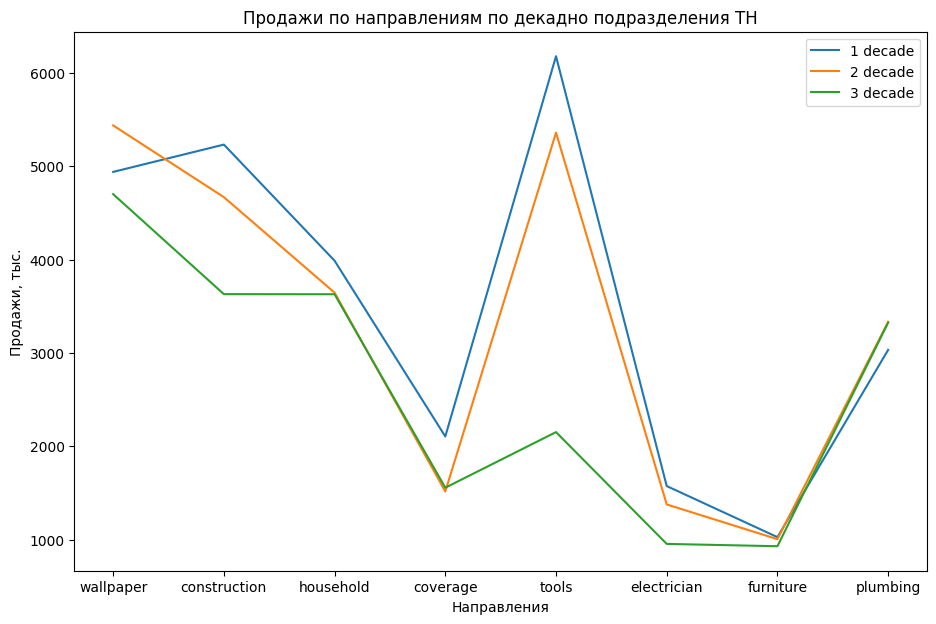

In [68]:
sales_th = sales[sales['subdivison'] == 'TH']
sales_th.drop('plan', axis=1).plot(x='direction',
                            title='Продажи по направлениям по декадно подразделения TH',
                             xlabel='Направления',
                             ylabel='Продажи, тыс.')

Из линейного графика видим, что продажи в 3ей декаде самые низкие, особенно провалилось направление инструментов и электрики

<Axes: title={'center': 'Продажи по направлениям по декадно (накопительно), в сравнении с Планом'}, xlabel='Направления', ylabel='Продажи, тыс.'>

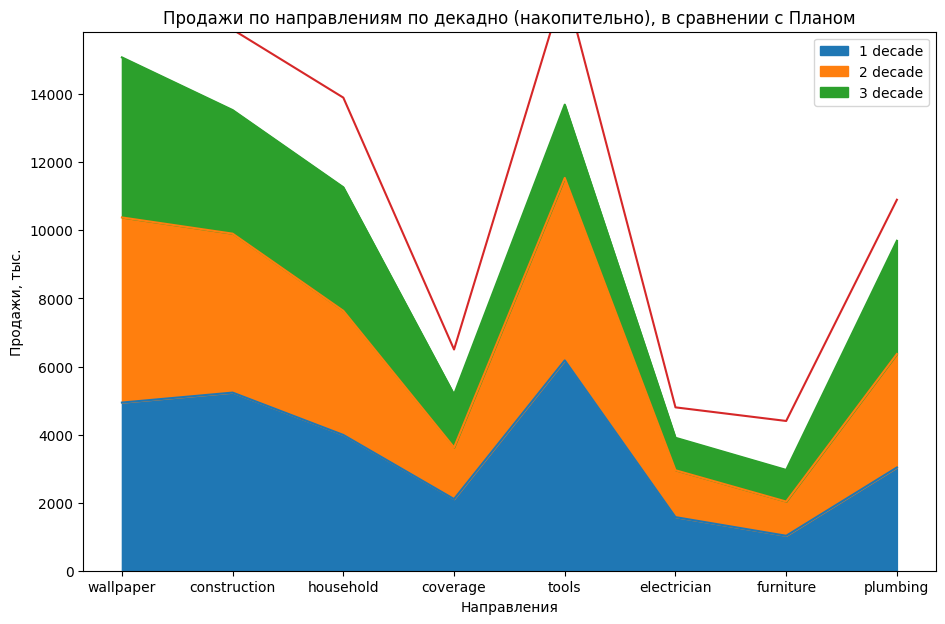

In [84]:
sales_th.drop('plan', axis=1).plot(kind='area',
                            stacked=True,
                            x='direction',
                            title='Продажи по направлениям по декадно (накопительно), в сравнении с Планом',
                             xlabel='Направления',
                             ylabel='Продажи, тыс.')
sales_th['plan'].plot()

Из диаграммы видно, что не один из отделов магазина не выполнил месячный план

<Axes: title={'center': '5 ведущих отделов по продажам TH'}, xlabel='Направления', ylabel='Продажи, тыс.'>

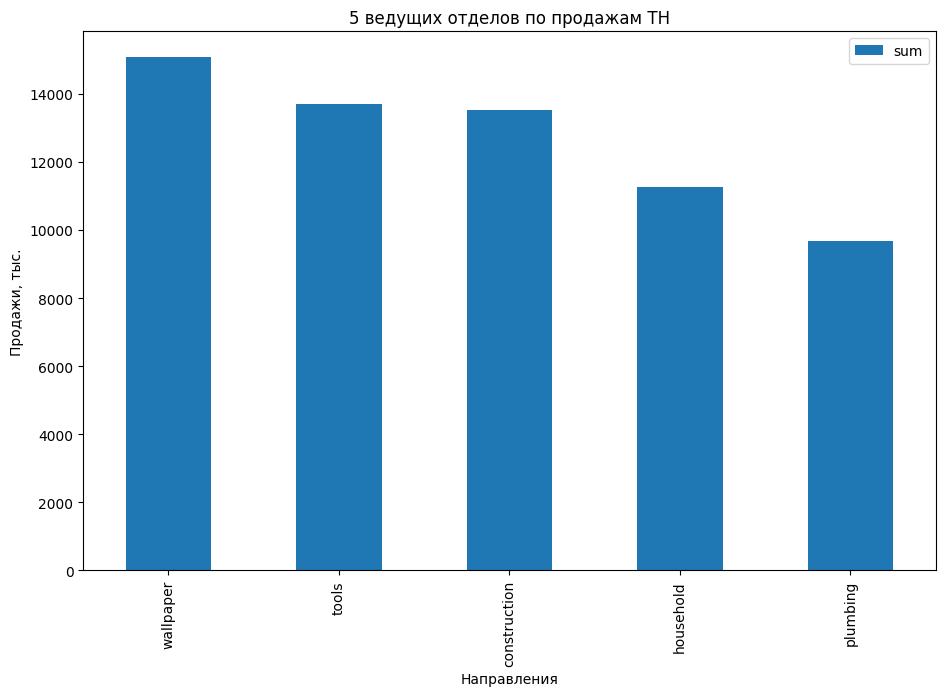

In [110]:
sales['sum'] = sales['1 decade'] + sales['2 decade'] + sales['3 decade']
sales_th_top = sales[sales['subdivison'] == 'TH'].sort_values('sum', ascending=False).head(5)

sales_th_top[['sum', 'direction']].plot(kind='bar',
                            x='direction',
                            title='5 ведущих отделов по продажам TH',
                             xlabel='Направления',
                             ylabel='Продажи, тыс.')

Из графика видны самые прибыльные отделы для фирмы магазина TH